## Stock Market Forecasting

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.

In [36]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for stock market.

In [37]:
df1 = pd.read_csv('Apple.csv')
df2= pd.read_csv('amazon.csv')
df3 = pd.read_csv("TATAMOTORS.csv")
stock=df2
stock_1 = df3

In [38]:
stock.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750
1,2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375
2,2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500
3,2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625
4,2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625


In [39]:
stock_1.head()
stock_1.drop(["Symbol","Series","Prev Close","Last","Turnover","Trades","Deliverable Volume","%Deliverble"],axis = 1)

,Date,Open,High,Low,Close,VWAP,Volume
0,2000-01-03,207.40,217.25,207.40,216.75,214.28,676126
1,2000-01-04,217.00,219.00,206.00,208.20,209.50,679215
2,2000-01-05,194.00,217.80,194.00,213.25,210.33,1120951
3,2000-01-06,215.00,229.90,215.00,222.10,225.29,1968998
4,2000-01-07,224.00,239.90,223.10,239.90,236.32,2199431
...,...,...,...,...,...,...,...
5199,2020-11-23,169.50,173.90,165.55,170.70,169.75,54566251
5200,2020-11-24,171.85,175.50,171.10,172.05,173.64,47695247
5201,2020-11-25,175.00,176.80,169.25,171.45,173.82,54366608
5202,2020-11-26,171.60,175.00,171.05,173.75,172.44,39094724


In [40]:
stock['Date'].min()

'2000-01-03'

In [41]:
stock_1['Date'].min()

'2000-01-03'

In [42]:
stock['Date'].max()

'2019-02-15'

In [8]:
stock_1['Date'].max()

'2020-11-27'

In [9]:
stock_1["Date"]

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5199    2020-11-23
5200    2020-11-24
5201    2020-11-25
5202    2020-11-26
5203    2020-11-27
Name: Date, Length: 5204, dtype: object

In [10]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')
stock.Date

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
4806    2019-02-11
4807    2019-02-12
4808    2019-02-13
4809    2019-02-14
4810    2019-02-15
Name: Date, Length: 4811, dtype: object

In [11]:
stock_1.Date = pd.to_datetime(stock_1.Date, format='%Y%m%d', errors='ignore')
stock_1.Date

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5199    2020-11-23
5200    2020-11-24
5201    2020-11-25
5202    2020-11-26
5203    2020-11-27
Name: Date, Length: 5204, dtype: object

## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [12]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [13]:
cols = ['High', 'Low', 'Open', 'Volume', 'VWAP']
stock_1.drop(cols, axis=1, inplace=True)
stock_1 = stock_1.sort_values('Date')

In [14]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [15]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [16]:
stock.head()

,Date,Close
0,2000-01-03,89.3750
1,2000-01-04,81.9375
2,2000-01-05,69.7500
3,2000-01-06,65.5625
4,2000-01-07,69.5625


In [17]:
stock_1.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Last                     0
Close                    0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [18]:
stock_1 = stock_1.groupby('Date')['Close'].sum().reset_index()

In [19]:
stock_1.head()

,Date,Close
0,2000-01-03,216.75
1,2000-01-04,208.20
2,2000-01-05,213.25
3,2000-01-06,222.10
4,2000-01-07,239.90


## Indexing with time series data

In [20]:
stock = stock.set_index('Date')
stock.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15'],
      dtype='object', name='Date', length=4811)

In [21]:
stock_1 = stock_1.set_index('Date')
stock_1.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2020-11-14', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
       '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27'],
      dtype='object', name='Date', length=5204)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [22]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock_1.Close.resample('M').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [23]:
stock_1.index = pd.to_datetime(stock_1.index)

monthly_mean = stock_1.Close.resample('M').mean()

Have a quick peek 2017 sales data.

In [24]:
x = monthly_mean['2018':]
x.mean()

192.46683906760126

## Visualizing Close time series data

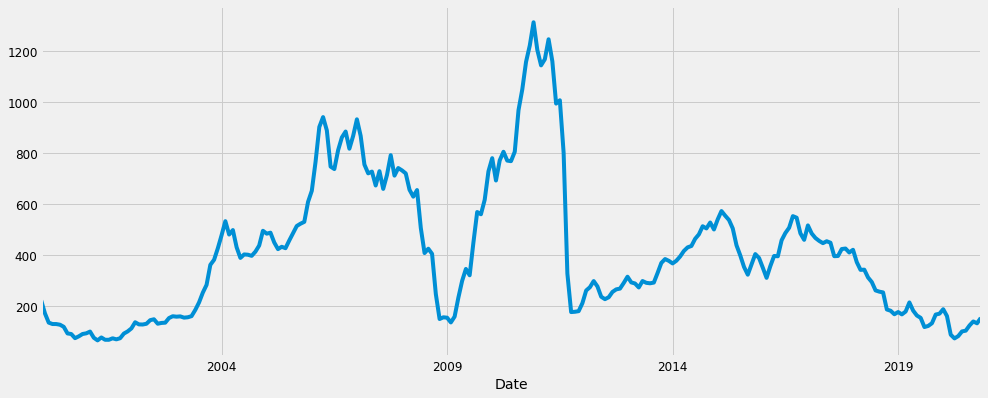

In [25]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

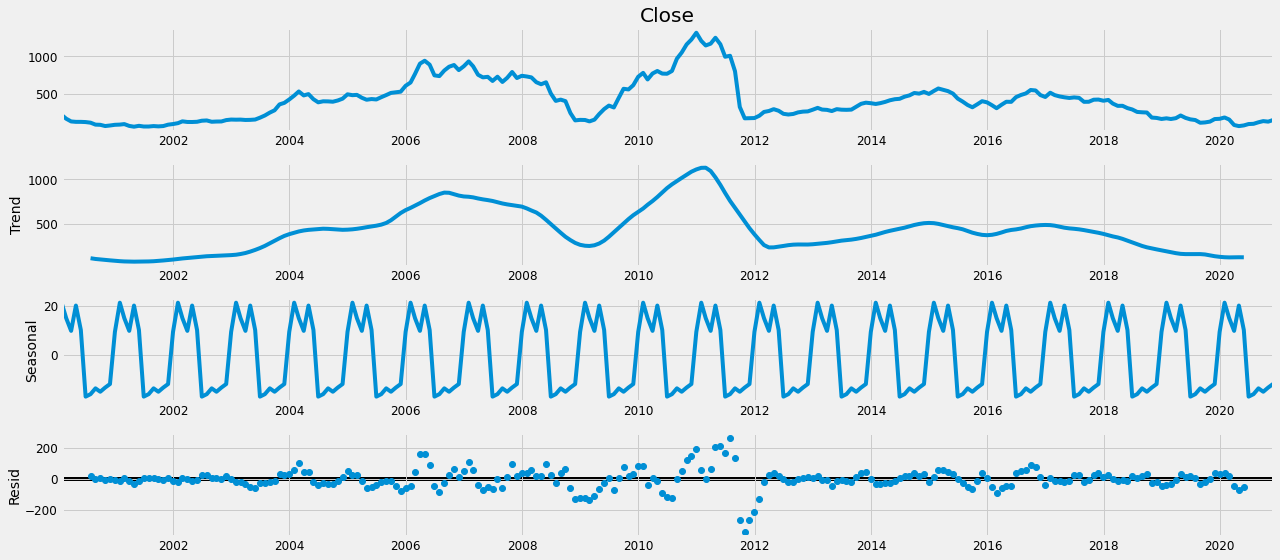

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:`

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3813.4305773592364
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3484.6994717594143
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3396.489527163875
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3200.490844583662
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3389.5823456282687
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3358.421431217307
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3241.8582179058494
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3190.0072911524503
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3476.3208665379825
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3167.109942562893
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3083.6130077202006
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2907.918611263356
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3087.5059278641893
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3051.9331599131565
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2956.8744480884016
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2901.83838059733
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2723.556597539873
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2603.6375044115493


/Users/krishnachaitanyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2617.807228087482
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2792.480691349052
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2514.8375140345497
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2615.287848835548
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2617.0602537632685
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2606.6294195876835
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2516.2069508208197
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2671.7599965635427


/Users/krishnachaitanyareddy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2555.7567088151736
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2699.3663793665155
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2454.840187466455
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2565.508639711886
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2557.6287524531544
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2542.964562528778
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2456.8370032282496
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2680.851414389627
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2564.595810624599
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2712.5926984312164
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2464.68302969273
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2564.632580234341
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2566.593029813877
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2541.773857417602
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2466.6792886475846
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2662.8152566090075
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2546.944743936186
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2695.6206941830287
ARI

In [30]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [31]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5017      0.035     14.457      0.000       0.434       0.570
ma.S.L12      -1.0000      0.050    -19.967      0.000      -1.098      -0.902
sigma2      2794.2986   1.79e-05   1.56e+08      0.000    2794.299    2794.299


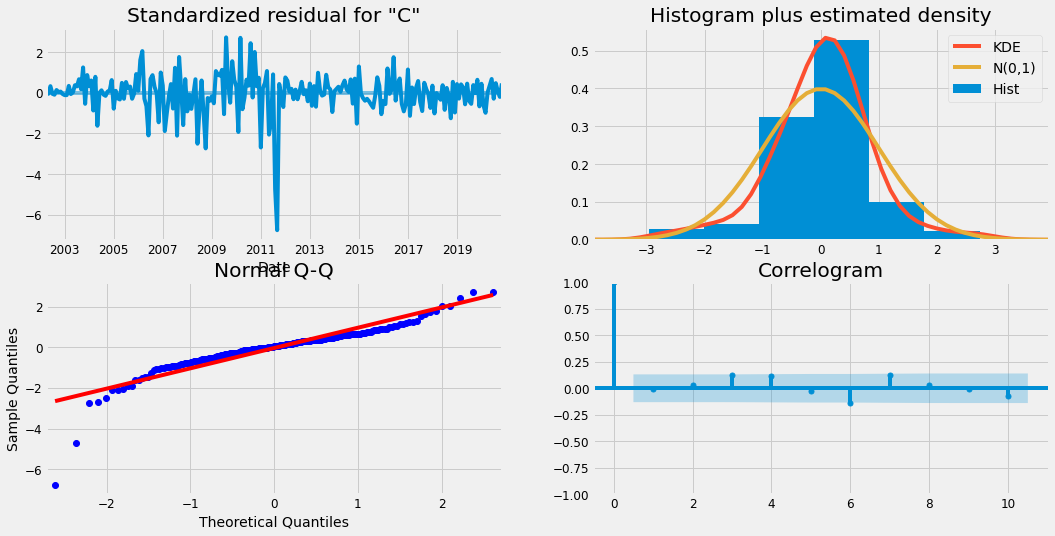

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at `2017-12-31` to the end of the data.

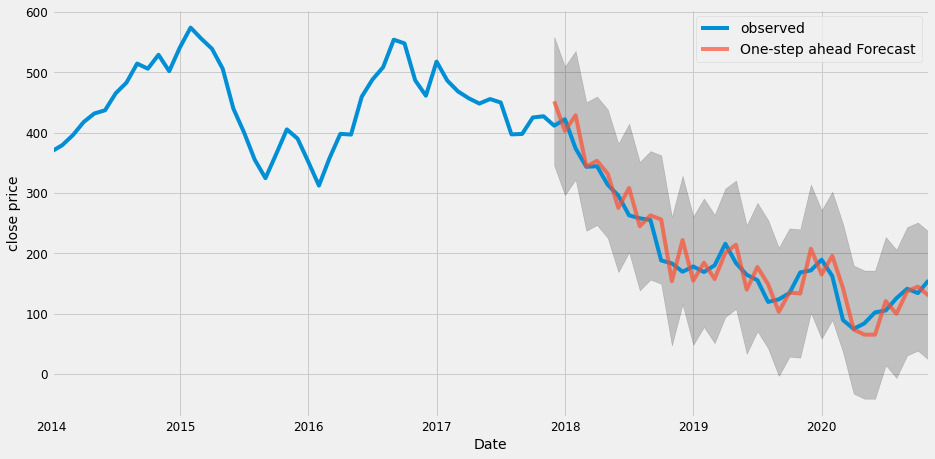

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [34]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 879.07


In [35]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 29.65


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion... of the real close price.

## Producing and visualizing forecasts

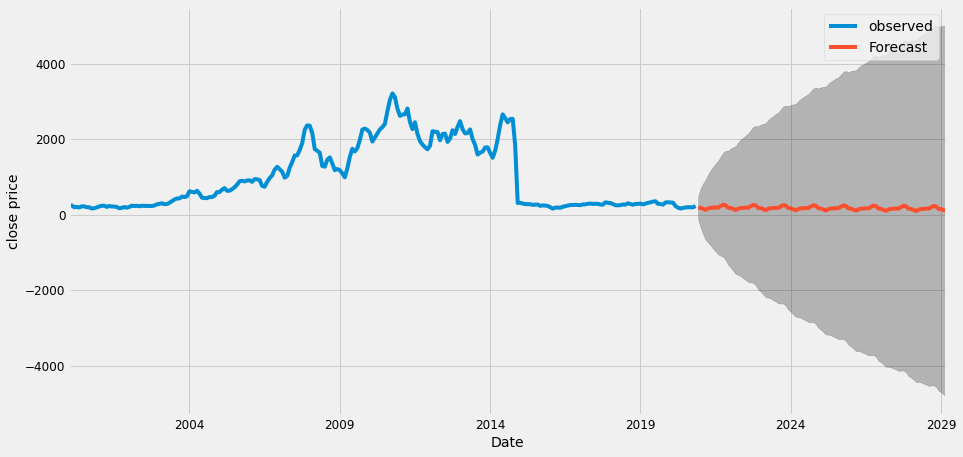

In [35]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()

Our model clearly captured close price seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.